In [1]:
import numpy as np
import matplotlib.pyplot as plt
r = np.random
def logfunc(x,x0,k,L):
    return L/(1+np.exp(-k*(x-x0)))
plt.rcParams['figure.figsize'] = [10, 10]

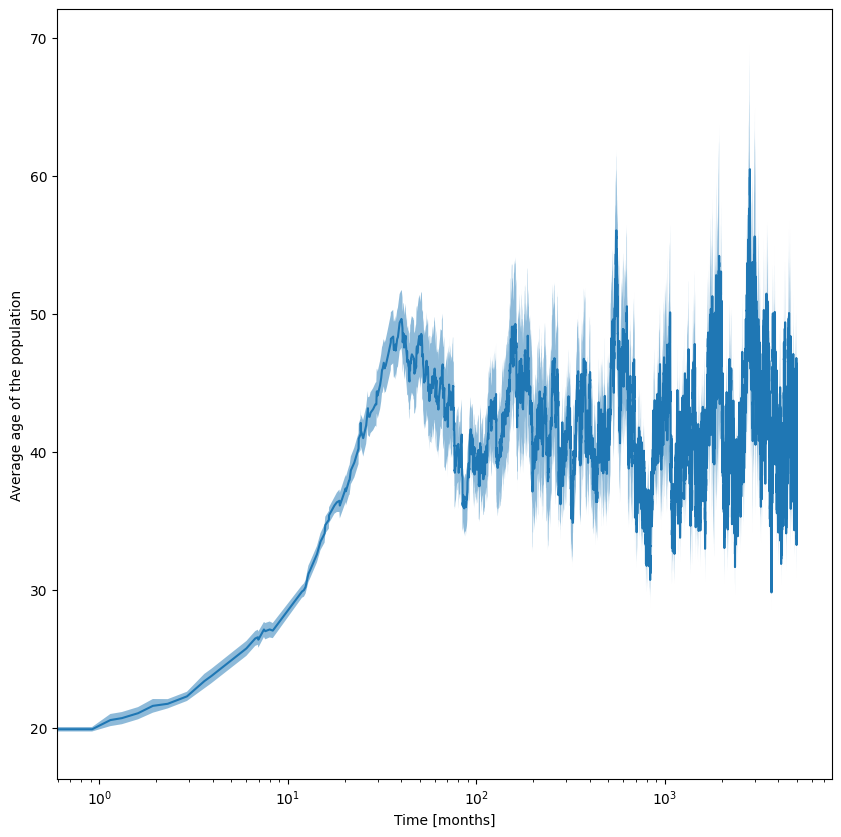

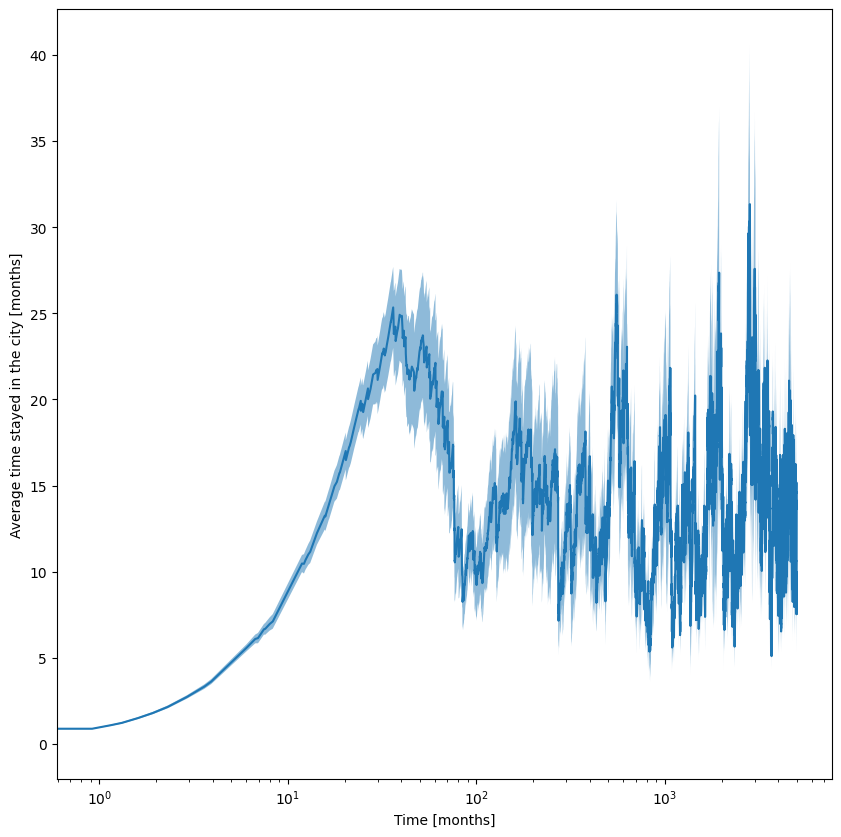

In [2]:
popsize = 40
minage = 18
start_age_pdf = r.exponential(1,popsize)+minage
avg_age = [np.mean(start_age_pdf)]
unc_age = [np.std(start_age_pdf)/np.sqrt(popsize)]
prob_moving = np.zeros(popsize)
time_stayed = np.zeros(popsize)
avg_time = [np.mean(time_stayed)]
unc_time = [np.std(time_stayed)/np.sqrt(popsize)]
L = r.uniform(0.001,0.1,popsize) #Maximum rate of moving out
k = r.uniform(0.05,0.5,popsize)
x0 = r.uniform(1,80,popsize)
moving_out_rates = logfunc(time_stayed,x0,k,L)
t = 0
Time = [0]
while t < 5000:
    s = 0
    R = np.sum(moving_out_rates)
    dt = r.exponential(1/R)/12
    start_age_pdf += dt
    time_stayed += dt
    t += dt
    Time.append(t)
    U = r.uniform(0,R)
    for i in range(popsize):
        s += moving_out_rates[i]
        if s > U:
            time_stayed[i] = 0
            start_age_pdf[i] = r.exponential(10)+minage
            L[i] = r.uniform(0.001,0.1)
            k[i] = r.uniform(0.01,0.5)
            x0[i] = r.uniform(0,8)
            avg_age.append(np.mean(start_age_pdf))
            unc_age.append(np.std(start_age_pdf)/np.sqrt(popsize))
            avg_time.append(np.mean(time_stayed))
            unc_time.append(np.std(time_stayed)/np.sqrt(popsize))
            break
    moving_out_rates = logfunc(time_stayed,x0,k,L)
plt.plot(Time,avg_age)
plt.xlabel('Time [months]')
plt.ylabel('Average age of the population')
plt.xscale('log')
plt.fill_between(Time,np.array(avg_age)-np.array(unc_age),np.array(avg_age)+np.array(unc_age),alpha=0.5)
#plt.errorbar(Time,avg_age,yerr=unc_age, fmt = '|')
plt.show()
plt.plot(Time,avg_time)
plt.xlabel('Time [months]')
plt.ylabel('Average time stayed in the city [months]')
plt.fill_between(Time,np.array(avg_time)-np.array(unc_time),np.array(avg_time)+np.array(unc_time),alpha=0.5)
plt.xscale('log')